<a href="https://colab.research.google.com/github/Kirupa-sankar-S/Predictive-Analysis-Decision-Trees/blob/main/Untitled24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('insurance.csv')

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# Convert categorical text data into numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

# Let's predict if someone is a Smoker (Classification)
X = df.drop('smoker', axis=1)
y = df['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Preprocessed and Split Successfully!")

Data Preprocessed and Split Successfully!


In [ ]:
# Model using Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
print(f"Gini Accuracy: {accuracy_score(y_test, y_pred_gini) * 100:.2f}%")

# Model using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
print(f"Entropy Accuracy: {accuracy_score(y_test, y_pred_entropy) * 100:.2f}%")

Gini Accuracy: 96.64%
Entropy Accuracy: 95.15%


In [ ]:
# Post-Pruning: Cost Complexity Pruning (CCP)
path = clf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# We choose a small alpha to prune slightly
clf_post_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[1])
clf_post_pruned.fit(X_train, y_train)

print("Post-pruned model trained.")

Post-pruned model trained.


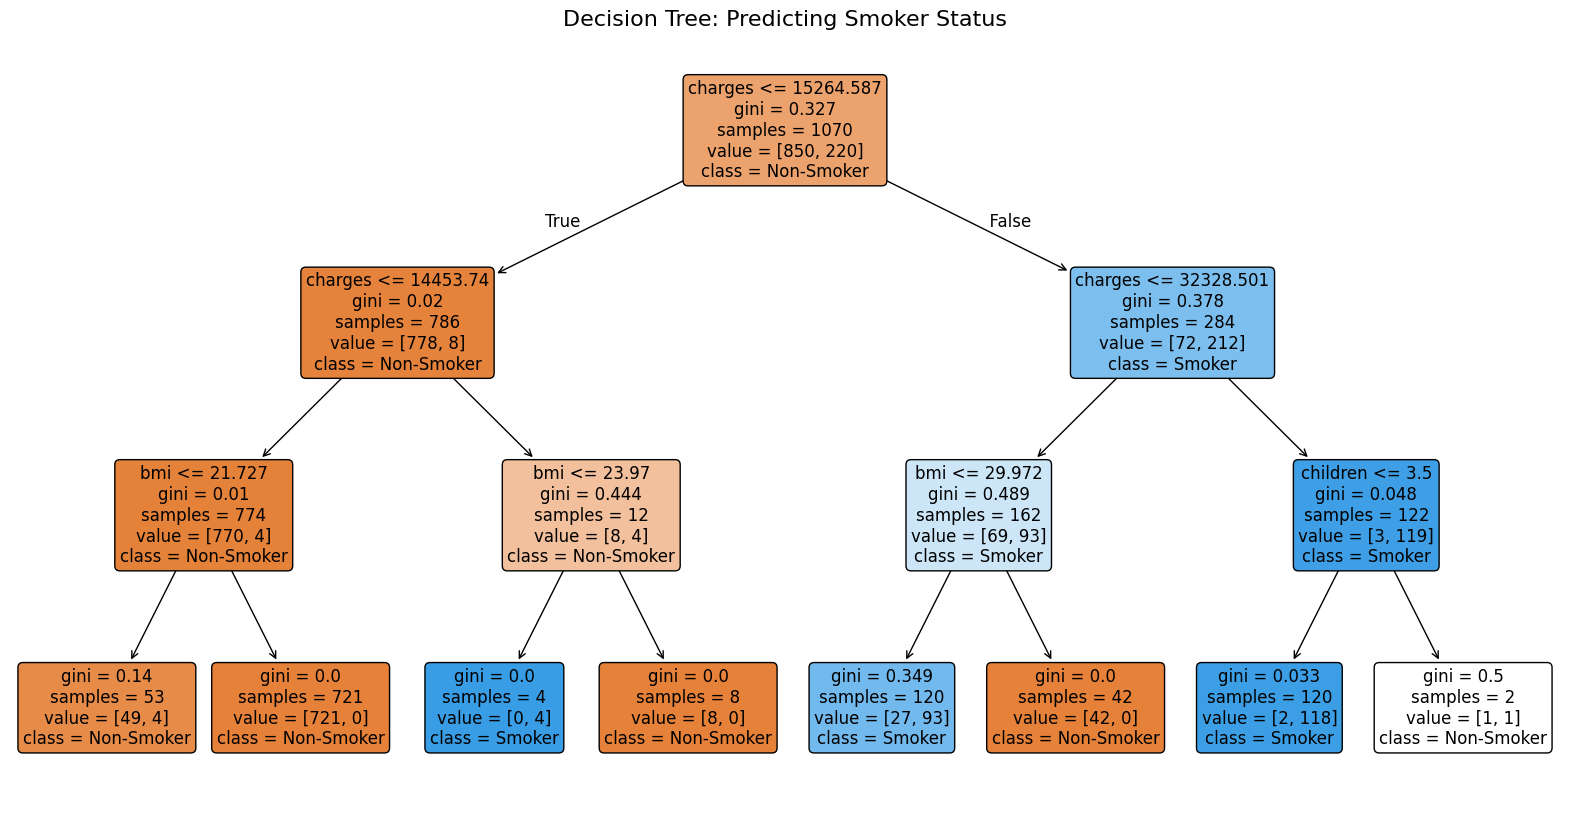

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini,
          feature_names=X.columns,
           class_names=['Non-Smoker', 'Smoker'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree: Predicting Smoker Status", fontsize=16)
plt.show()

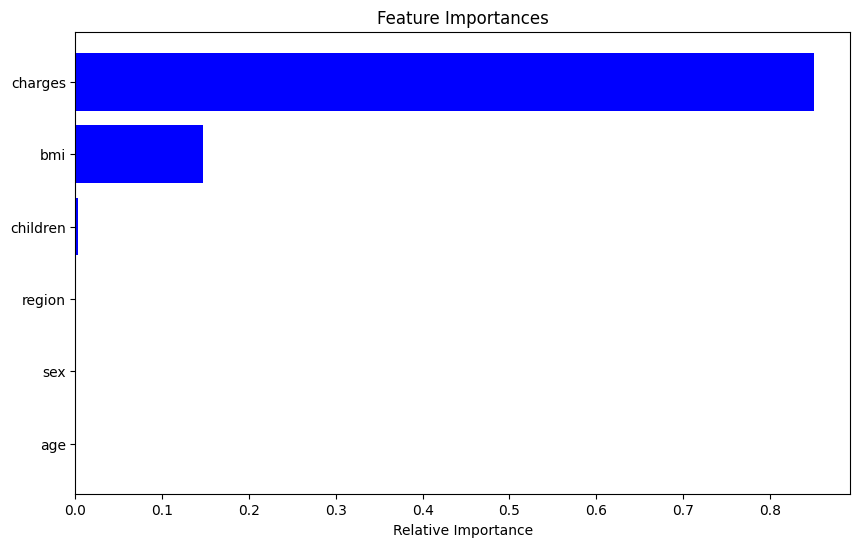

In [ ]:
import numpy as np

importances = clf_gini.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()